# COVID-19 Forecast Using ARMA, ARIMA, SARIMA Models
## DS 440 

In [36]:
# Import packages
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [37]:
# read in dataset
df = pd.read_csv('covid.csv')

In [38]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2/24/2020,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2/25/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2/26/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2/27/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2/28/2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [39]:
# Quantify rows and columns
df.shape

(155261, 67)

In [40]:
# List of columns
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

# Create different simple models for predicting number of deaths for one region (I'm choosing USA)

In [41]:
# Subset data for only US data
df_us = df.loc[df['location'] == 'United States']

In [42]:
df_us.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
146768,USA,North America,United States,1/22/2020,1.0,NaN,NaN,NaN,NaN,NaN,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
146769,USA,North America,United States,1/23/2020,1.0,0.0,NaN,NaN,NaN,NaN,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
146770,USA,North America,United States,1/24/2020,2.0,1.0,NaN,NaN,NaN,NaN,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
146771,USA,North America,United States,1/25/2020,2.0,0.0,NaN,NaN,NaN,NaN,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
146772,USA,North America,United States,1/26/2020,5.0,3.0,NaN,NaN,NaN,NaN,...,19.1,24.6,NaN,2.77,78.86,0.926,-8925.0,-3.59,-2.63,-26.808639


In [43]:
# Subset for only the dates and total_cases columns (time series data only works with 
# one variable from what I can find)

df_us_cases = df_us[['date', 'total_cases']]
df_us_cases.head()

,date,total_cases
146768,1/22/2020,1.0
146769,1/23/2020,1.0
146770,1/24/2020,2.0
146771,1/25/2020,2.0
146772,1/26/2020,5.0


In [44]:
print(df_us_cases['total_cases'].isnull().sum())
print(df_us_cases['total_cases'].isna().sum())

0
0


In [45]:
df_us_cases.tail()

,date,total_cases
147490,1/13/2022,64062060.0
147491,1/14/2022,64920670.0
147492,1/15/2022,65445434.0
147493,1/16/2022,65703875.0
147494,1/17/2022,66529280.0


In [46]:
# Need to set the date col to be a df index and format the date column to a date type
df_us_cases.index = pd.to_datetime(df_us_cases['date'], format='%m/%d/%Y')

In [47]:
# Can delete date col because it is an index now
del df_us_cases['date']
df_us_cases.head()

,total_cases
date,
2020-01-22,1.0
2020-01-23,1.0
2020-01-24,2.0
2020-01-25,2.0
2020-01-26,5.0


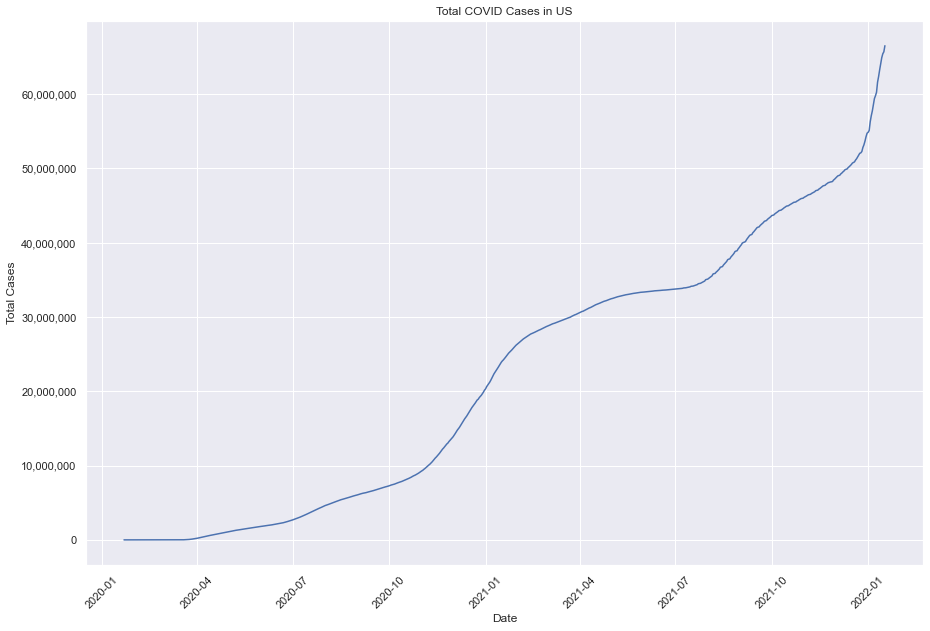

In [48]:
# Plot the total cases

sns.set()
plt.xlabel('Date')
plt.xticks(rotation= 45)
plt.ylabel('Total Cases')
plt.title('Total COVID Cases in US')
plt.ticklabel_format(style='plain') 
plt.plot(df_us_cases.index, df_us_cases['total_cases'])

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

In [49]:
# Split the data into a training and testing set
# Training will be all data before December 2021 and Testing will be all data since then
#df_us.head()
train = df_us_cases[df_us_cases.index < pd.to_datetime('2021-12-01', format='%Y-%m-%d')]
test = df_us_cases[df_us_cases.index >= pd.to_datetime('2021-12-01', format='%Y-%m-%d')]


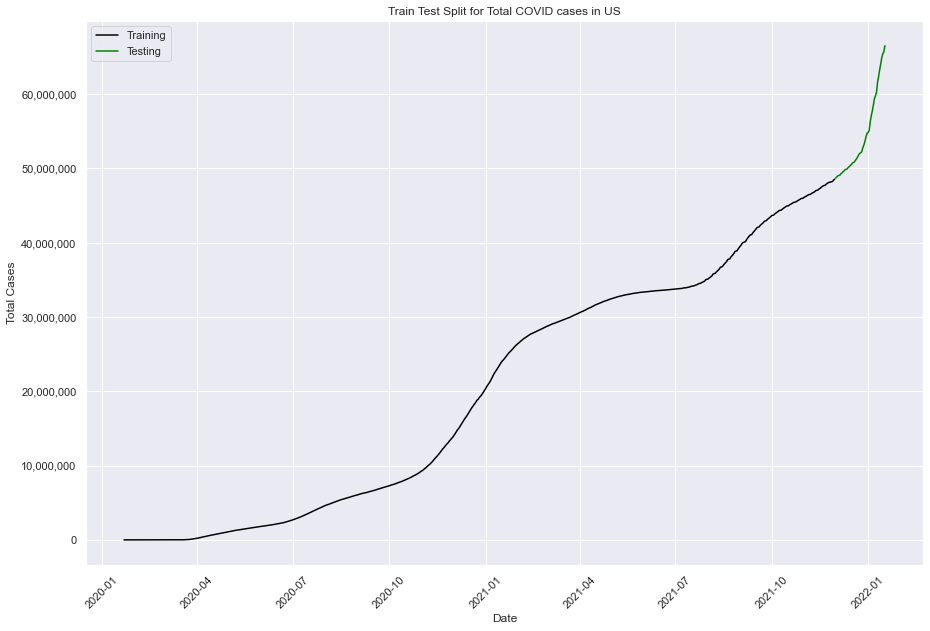

In [50]:
# Plot the training set in green and the testing set in red
plt.xlabel('Date')
plt.xticks(rotation= 45)
plt.ylabel('Total Cases')
plt.title('Train Test Split for Total COVID cases in US')
plt.ticklabel_format(style='plain') 
plt.plot(train, color = 'black', label = 'Training')
plt.plot(test, color = 'green', label = 'Testing')
plt.legend()
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

# Implement a simple Autoregressive Moving Average (ARMA) model

In [51]:
# packages needed for ARMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [52]:
# define input 
y = train['total_cases']

In [53]:
# To make ARMA model from SARIMAX class we need to pass in the order parameters of (1,0,1)

ARMAmodel = SARIMAX(y, order = (1,0,1))

In [54]:
# Fit the model
ARMAmodel = ARMAmodel.fit()

In [55]:
# Generate predictions
y_pred_arma = ARMAmodel.get_forecast(len(test.index))

y_pred_df_arma = y_pred_arma.conf_int(alpha = 0.05)

y_pred_df_arma["Predictions"] = ARMAmodel.predict(start = y_pred_df_arma.index[0], end = y_pred_df_arma.index[-1])

y_pred_df_arma.index = test.index

y_pred_out_arma = y_pred_df_arma["Predictions"]



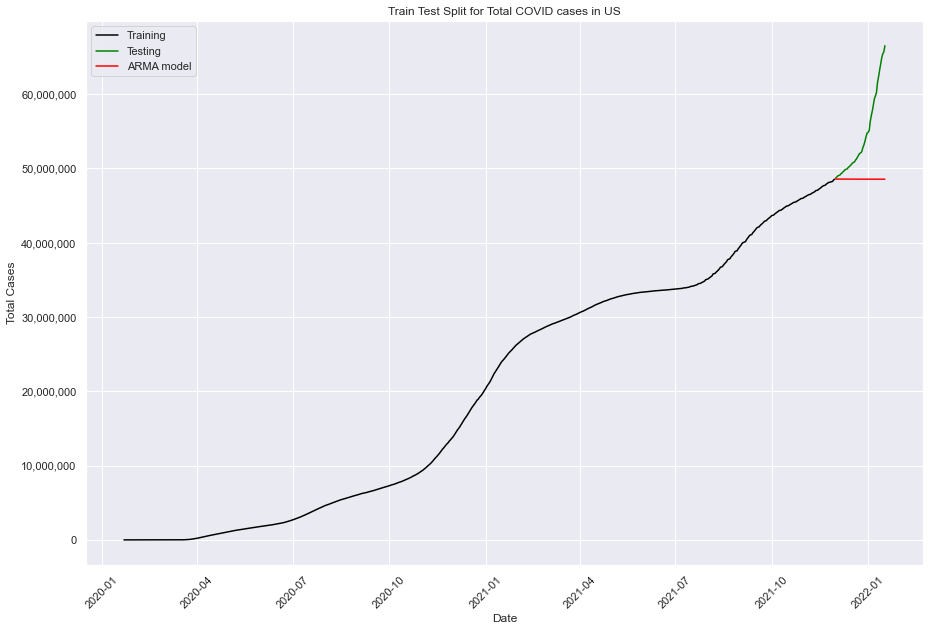

In [56]:
# Plot the result to compare to actual values
plt.xlabel('Date')
plt.xticks(rotation= 45)
plt.ylabel('Total Cases')
plt.title('Train Test Split for Total COVID cases in US')
plt.ticklabel_format(style='plain') 
plt.plot(train, color = 'black', label = 'Training')
plt.plot(test, color = 'green', label = 'Testing')
plt.plot(y_pred_out_arma, color="red", label = 'ARMA model')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.rcParams['figure.figsize'] = [15, 10]
plt.legend()
plt.show()



In [57]:
# Evaluate performance for ARMA
ARMA_rmse = np.sqrt(mean_squared_error(test['total_cases'].values, y_pred_df_arma["Predictions"]))

print("ARMA RMSE: ", ARMA_rmse)

ARMA RMSE:  7926703.207987038


### Very high RMSE because ARMA does not perform well with non-stationary time series data

# Implement a simple Autoregressive Integrated Moving Average (ARIMA) model to try to improve on ARMA model

In [58]:
# Import packages for ARIMA
from statsmodels.tsa.arima.model import ARIMA

In [59]:
# ARIMA model takes 3 parameters. The first corresponds to the past values (lagging), the second corresponds to differencing,
# the third corresponds to white noise
# I'm going make a simple model with (2,2,2) for now

ARIMAmodel = ARIMA(y, order=(2,2,2))

In [60]:
# fit the model
ARIMAmodel = ARIMAmodel.fit()

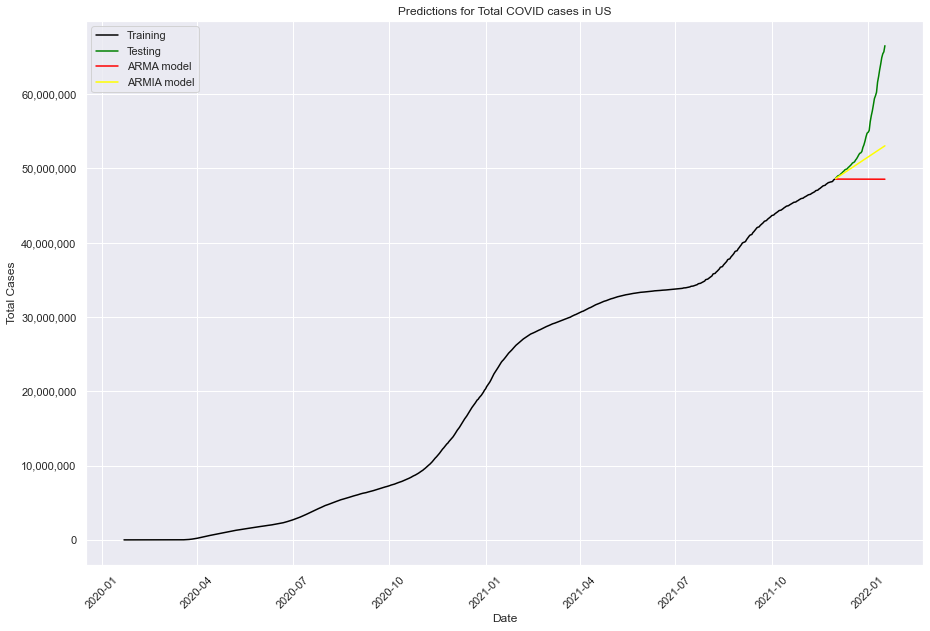

In [61]:
# Generate predictions
y_pred_arima = ARIMAmodel.get_forecast(len(test.index))

y_pred_df_arima = y_pred_arima.conf_int(alpha = 0.05)
y_pred_df_arima["Predictions"] = ARIMAmodel.predict(start = y_pred_df_arima.index[0], end = y_pred_df_arima.index[-1])
y_pred_df_arima.index = test.index
y_pred_out_arima = y_pred_df_arima["Predictions"]


plt.xlabel('Date')
plt.xticks(rotation= 45)
plt.ylabel('Total Cases')
plt.title('Predictions for Total COVID cases in US')
plt.ticklabel_format(style='plain') 
plt.plot(train, color = 'black', label = 'Training')
plt.plot(test, color = 'green', label = 'Testing')
plt.plot(y_pred_out_arma, color="red", label = 'ARMA model')
plt.plot(y_pred_out_arima, color="yellow", label = 'ARMIA model')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.rcParams['figure.figsize'] = [15, 10]
plt.legend()
plt.show()

In [62]:
# Evaluate performance for ARIMA
ARIMA_rmse = np.sqrt(mean_squared_error(test['total_cases'].values, y_pred_df_arima["Predictions"]))

print("ARIMA RMSE: ", ARIMA_rmse)

ARIMA RMSE:  5480156.689150412


### We can further tweak the ARIMA model by changing the 3 parameters
### First, I will increase the second parameter from 2 --> 4 and plot the new predictions

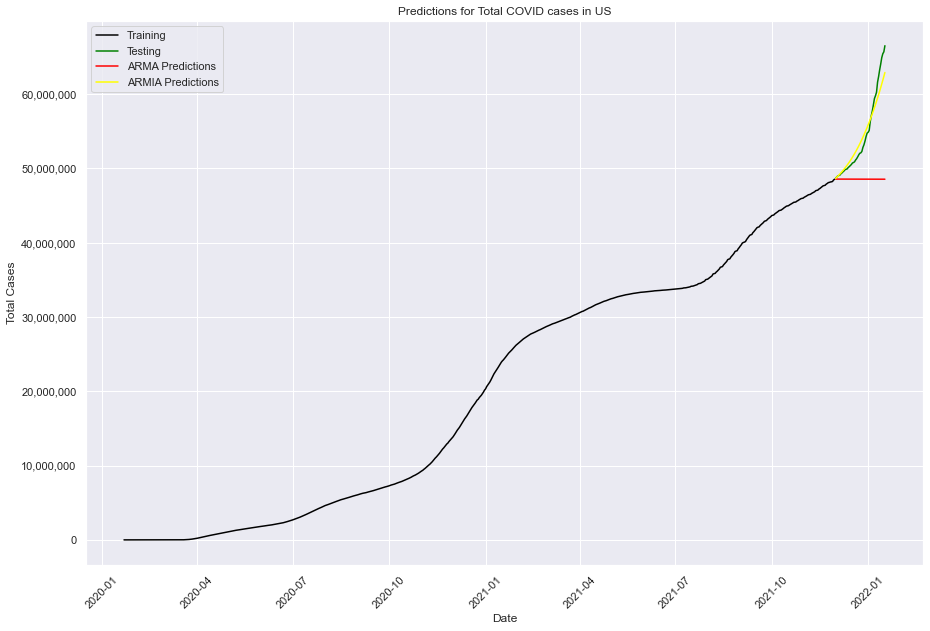

In [63]:
ARIMAmodel = ARIMA(y, order=(2,4,2))
ARIMAmodel = ARIMAmodel.fit()
y_pred_arima = ARIMAmodel.get_forecast(len(test.index))

y_pred_df_arima = y_pred_arima.conf_int(alpha = 0.05)
y_pred_df_arima["Predictions"] = ARIMAmodel.predict(start = y_pred_df_arima.index[0], end = y_pred_df_arima.index[-1])
y_pred_df_arima.index = test.index
y_pred_out_arima = y_pred_df_arima["Predictions"]


plt.xlabel('Date')
plt.xticks(rotation= 45)
plt.ylabel('Total Cases')
plt.title('Predictions for Total COVID cases in US')
plt.ticklabel_format(style='plain') 
plt.plot(train, color = 'black', label = 'Training')
plt.plot(test, color = 'green', label = 'Testing')
plt.plot(y_pred_out_arma, color="red", label = 'ARMA Predictions')
plt.plot(y_pred_out_arima, color="yellow", label = 'ARMIA Predictions')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.rcParams['figure.figsize'] = [15, 10]
plt.legend()
plt.show()

In [64]:
# Evaluate performance for ARIMA
ARIMA_rmse = np.sqrt(mean_squared_error(test['total_cases'].values, y_pred_df_arima["Predictions"]))

print("ARIMA RMSE: ", ARIMA_rmse)

ARIMA RMSE:  1505190.4919707407


### We can see that the RMSE was reduced by a factor of 3.7 just by changing this paramter
### I'm going to tune all three parameters and get the best RMSE I can get

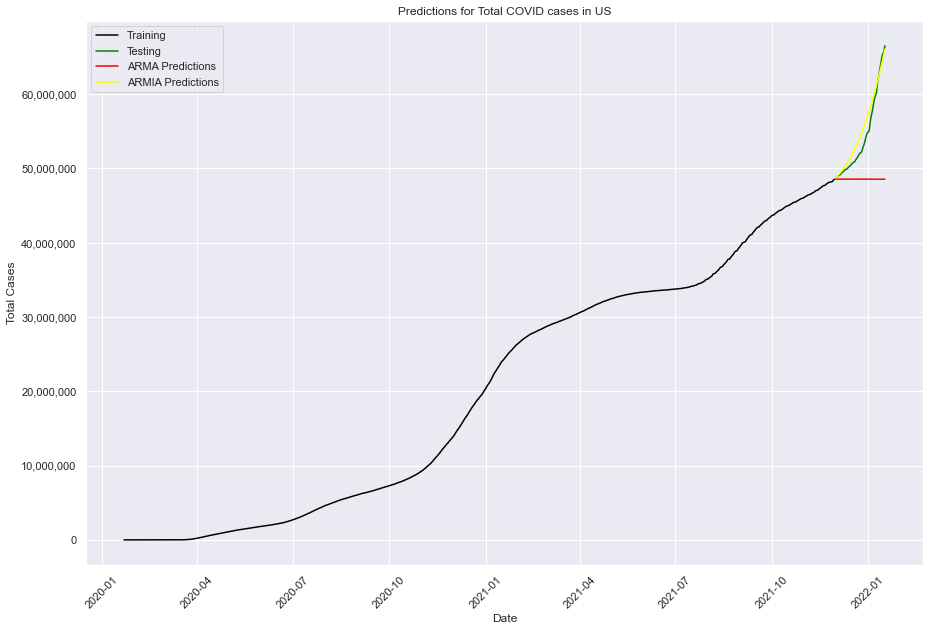

In [65]:
ARIMAmodel = ARIMA(y, order=(1,4,2))
ARIMAmodel = ARIMAmodel.fit()
y_pred_arima = ARIMAmodel.get_forecast(len(test.index))

y_pred_df_arima = y_pred_arima.conf_int(alpha = 0.05)
y_pred_df_arima["Predictions"] = ARIMAmodel.predict(start = y_pred_df_arima.index[0], end = y_pred_df_arima.index[-1])
y_pred_df_arima.index = test.index
y_pred_out_arima = y_pred_df_arima["Predictions"]


plt.xlabel('Date')
plt.xticks(rotation= 45)
plt.ylabel('Total Cases')
plt.title('Predictions for Total COVID cases in US')
plt.ticklabel_format(style='plain') 
plt.plot(train, color = 'black', label = 'Training')
plt.plot(test, color = 'green', label = 'Testing')
plt.plot(y_pred_out_arma, color="red", label = 'ARMA Predictions')
plt.plot(y_pred_out_arima, color="yellow", label = 'ARMIA Predictions')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.rcParams['figure.figsize'] = [15, 10]
plt.legend()
plt.show()

In [66]:
# Evaluate performance for ARIMA
ARIMA_rmse = np.sqrt(mean_squared_error(test['total_cases'].values, y_pred_df_arima["Predictions"]))

print("ARIMA RMSE: ", ARIMA_rmse)

ARIMA RMSE:  1423549.3174365633


## ARIMA performed better than ARMA, but SARIMA should perform even better judging by the graph

# Implement a simple Seasonal Autoregressive Integrated Moving Average (SARIMA) model to try to improve on ARIMA model

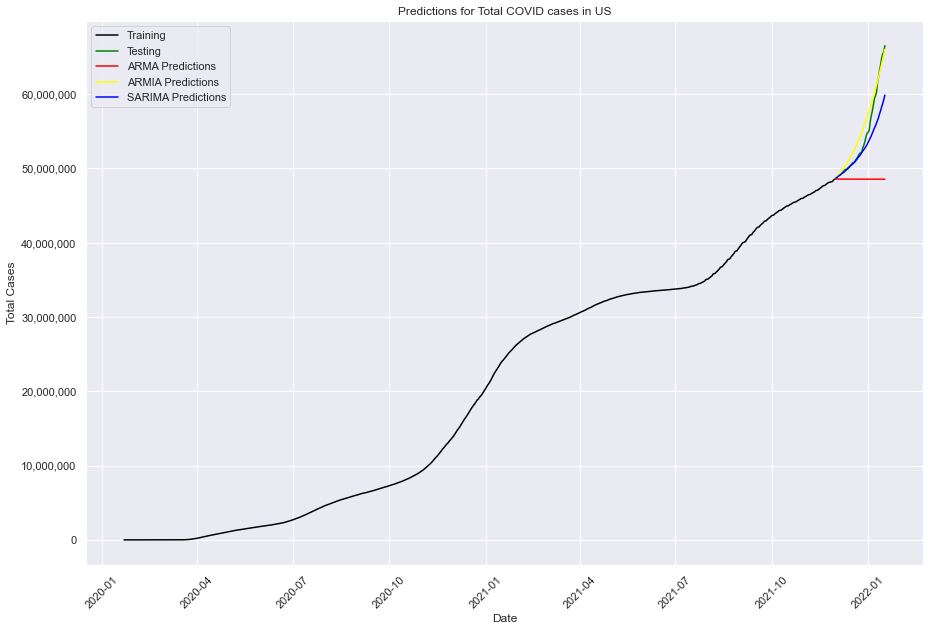

In [67]:
SARIMAXmodel = SARIMAX(y, order = (1, 4, 2), seasonal_order=(2,2,4,11))
SARIMAXmodel = SARIMAXmodel.fit()
y_pred_sarima = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df_sarima = y_pred_sarima.conf_int(alpha = 0.05)
y_pred_df_sarima["Predictions"] = SARIMAXmodel.predict(start = y_pred_df_sarima.index[0], end = y_pred_df_sarima.index[-1])
y_pred_df_sarima.index = test.index
y_pred_out_sarima = y_pred_df_sarima["Predictions"]


plt.xlabel('Date')
plt.xticks(rotation= 45)
plt.ylabel('Total Cases')
plt.title('Predictions for Total COVID cases in US')
plt.ticklabel_format(style='plain') 
plt.plot(train, color = 'black', label = 'Training')
plt.plot(test, color = 'green', label = 'Testing')
plt.plot(y_pred_out_arma, color="red", label = 'ARMA Predictions')
plt.plot(y_pred_out_arima, color="yellow", label = 'ARMIA Predictions')
plt.plot(y_pred_out_sarima, color="Blue", label = "SARIMA Predictions")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.rcParams['figure.figsize'] = [15, 10]
plt.legend()
plt.show()

In [68]:
# Evaluate performance for SARIMA
SARIMA_rmse = np.sqrt(mean_squared_error(test['total_cases'].values, y_pred_df_sarima["Predictions"]))

print("SARIMA RMSE: ", SARIMA_rmse)

SARIMA RMSE:  2866245.6024325476


### By using SARIMA we cut the RMSE almost in half from ARIMA (1,400,118 ----> 837,710)

### Heres a closer look at our predictions using the three models

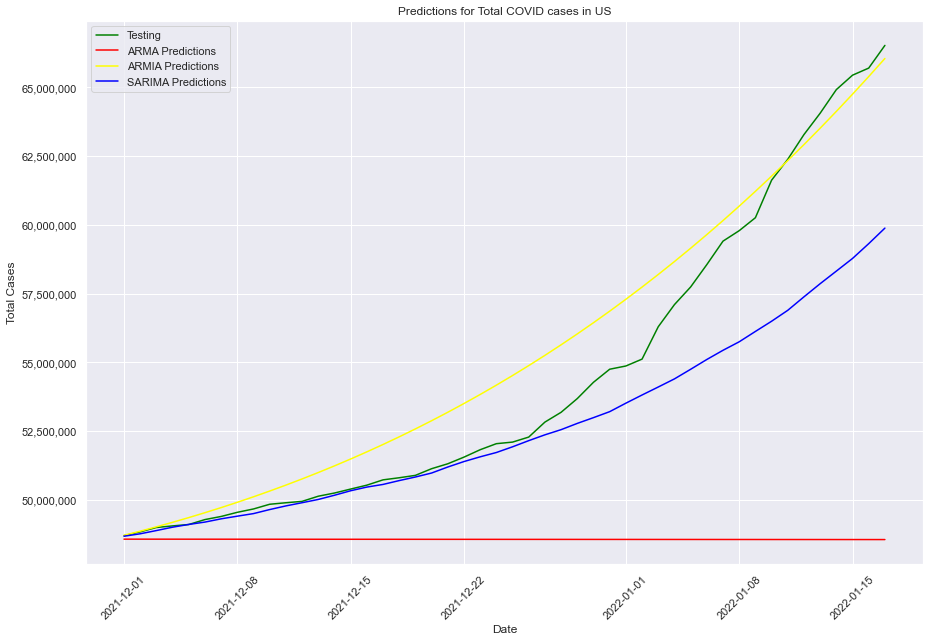

In [69]:
plt.xlabel('Date')
plt.xticks(rotation= 45)
plt.ylabel('Total Cases')
plt.title('Predictions for Total COVID cases in US')
plt.ticklabel_format(style='plain') 
plt.plot(test, color = 'green', label = 'Testing')
plt.plot(y_pred_out_arma, color="red", label = 'ARMA Predictions')
plt.plot(y_pred_out_arima, color="yellow", label = 'ARMIA Predictions')
plt.plot(y_pred_out_sarima, color="Blue", label = "SARIMA Predictions")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.rcParams['figure.figsize'] = [15, 10]
plt.legend()
plt.show()

# Predict total cases for the rest of 2022 using the SARIMA model

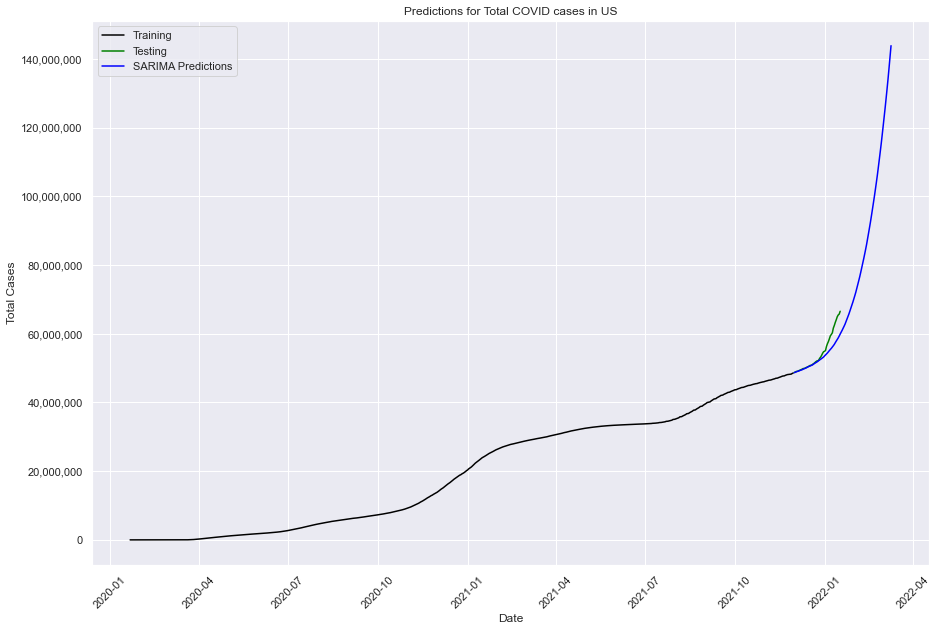

In [70]:
y_pred_sarima = SARIMAXmodel.get_forecast(steps=100)
y_pred_df_sarima = y_pred_sarima.conf_int(alpha = 0.05)
y_pred_df_sarima["Predictions"] = SARIMAXmodel.predict(start = y_pred_df_sarima.index[0], end = y_pred_df_sarima.index[-1])
y_pred_out_sarima = y_pred_df_sarima["Predictions"]

plt.xlabel('Date')
plt.xticks(rotation= 45)
plt.ylabel('Total Cases')
plt.title('Predictions for Total COVID cases in US')
plt.ticklabel_format(style='plain') 
plt.plot(train, color = 'black', label = 'Training')
plt.plot(test, color = 'green', label = 'Testing')
plt.plot(y_pred_out_sarima, color="Blue", label = "SARIMA Predictions")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.rcParams['figure.figsize'] = [15, 10]
plt.legend()
plt.show()


### Model seems to be overfit so I'm going to implement a grid search to find the best parameters

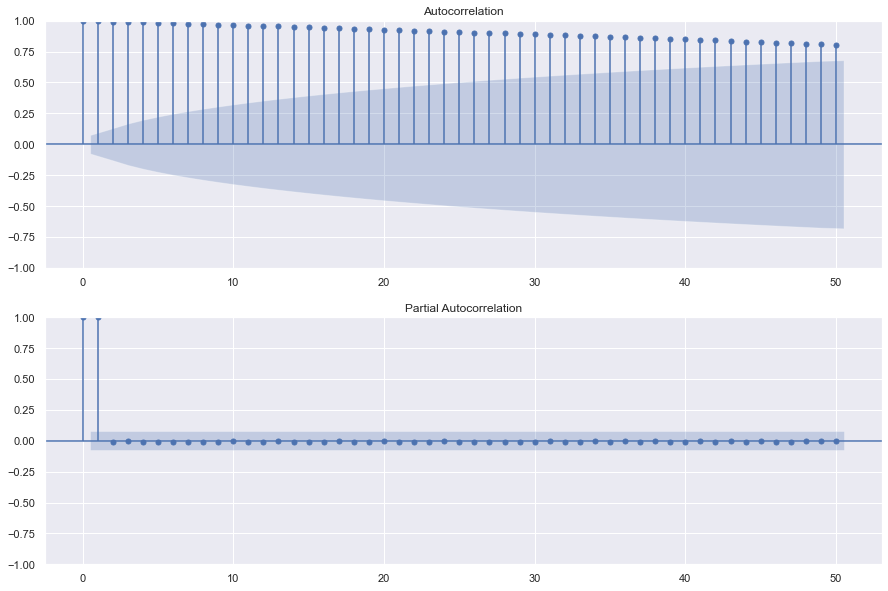

In [71]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
fig, ax = plt.subplots(2,1)
fig = sm.graphics.tsa.plot_acf(train, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(train, lags=50, ax=ax[1])
plt.show()

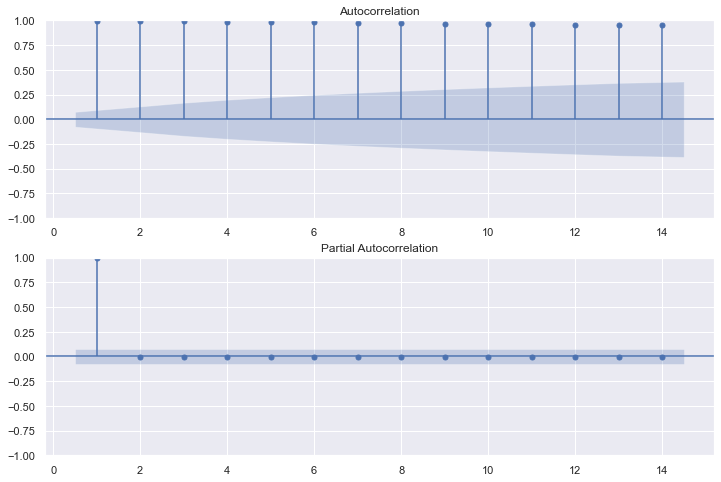

In [72]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF of df_store_2_item_28_timeon ax1
plot_acf(train,lags=14, zero=False, ax=ax1)

# Plot the PACF of df_store_2_item_28_timeon ax2
plot_pacf(train,lags=14, zero=False, ax=ax2)

plt.show()

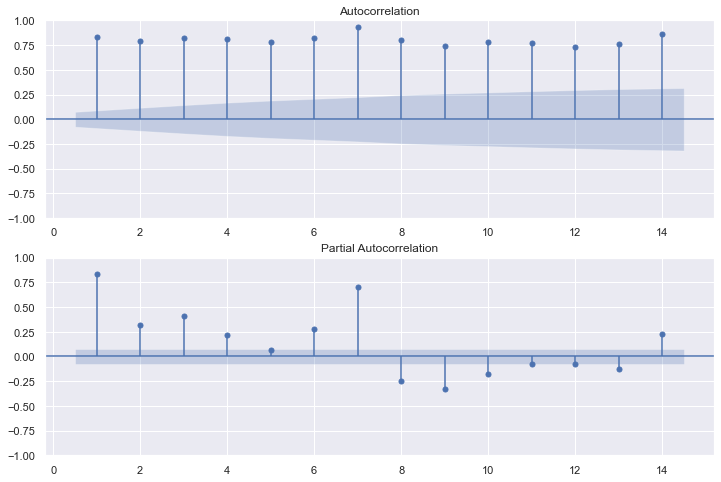

In [73]:
# Data not stationary so need to difference
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF of df_store_2_item_28_timeon ax1
plot_acf(train.diff().dropna(),lags=14, zero=False, ax=ax1)

# Plot the PACF of df_store_2_item_28_timeon ax2
plot_pacf(train.diff().dropna(),lags=14, zero=False, ax=ax2)

plt.show()

In [74]:
### Import Packages ###

import itertools
import statsmodels.api as sm

# Note: higher numbers will result in code taking much longer to run
# Here we have it set to test p,d,q each = 0, 1 & 2

# Define the p, d and q parameters to take any value between 0 and 3 (exclusive)
p = d = q = range(0, 3)


# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
# Note: here we have 12 in the 's' position as we have monthly data
pdqs = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]

### Run Grid Search ###

def sarimax_gridsearch(ts, pdq, pdqs, maxiter=100, freq='D'):
    '''
    Input: 
        ts : your time series data
        pdq : ARIMA combinations from above
        pdqs : seasonal ARIMA combinations from above
        maxiter : number of iterations, increase if your model isn't converging
        frequency : default='M' for month. Change to suit your time series frequency
            e.g. 'D' for day, 'H' for hour, 'Y' for year. 
        
    Return:
        Prints out top 5 parameter combinations
        Returns dataframe of parameter combinations ranked by BIC
    '''

    # Run a grid search with pdq and seasonal pdq parameters and get the best BIC value
    ans = []
    for comb in pdq:
        for combs in pdqs:
                mod = SARIMAX(ts, # this is your time series you will input
                                                order=comb,
                                                seasonal_order=combs,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False,
                                                freq=freq)

                output = mod.fit(maxiter=maxiter) 
                ans.append([comb, combs, output.aic])
                print('SARIMAX {} x {} : AIC Calculated ={}'.format(comb, combs, output.aic))

            
    # Find the parameters with minimal AIC value

    # Convert into dataframe
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])

    # Sort and return top 5 combinations
    ans_df = ans_df.sort_values(by=['aic'],ascending=True)[0:5]
    
    return ans_df
    

In [75]:
import warnings
warnings.filterwarnings('ignore')
sarimax_gridsearch(y, pdq, pdqs, freq='D')

SARIMAX (0, 0, 0) x (0, 0, 0, 7) : AIC Calculated =25053.782819262175
SARIMAX (0, 0, 0) x (0, 0, 1, 7) : AIC Calculated =24408.92303054223
SARIMAX (0, 0, 0) x (0, 0, 2, 7) : AIC Calculated =23972.260783897247
SARIMAX (0, 0, 0) x (0, 1, 0, 7) : AIC Calculated =19880.87541467965
SARIMAX (0, 0, 0) x (0, 1, 1, 7) : AIC Calculated =19216.47625812706
SARIMAX (0, 0, 0) x (0, 1, 2, 7) : AIC Calculated =18920.057614067646
SARIMAX (0, 0, 0) x (0, 2, 0, 7) : AIC Calculated =17247.664817565194
SARIMAX (0, 0, 0) x (0, 2, 1, 7) : AIC Calculated =17119.518734006895
SARIMAX (0, 0, 0) x (0, 2, 2, 7) : AIC Calculated =16751.34360225071
SARIMAX (0, 0, 0) x (1, 0, 0, 7) : AIC Calculated =19416.106272137113
SARIMAX (0, 0, 0) x (1, 0, 1, 7) : AIC Calculated =18928.864197763683
SARIMAX (0, 0, 0) x (1, 0, 2, 7) : AIC Calculated =19083.699773209442
SARIMAX (0, 0, 0) x (1, 1, 0, 7) : AIC Calculated =17272.36464711662
SARIMAX (0, 0, 0) x (1, 1, 1, 7) : AIC Calculated =17286.88504908632
SARIMAX (0, 0, 0) x (1, 1,

SARIMAX (0, 1, 1) x (1, 0, 1, 7) : AIC Calculated =16621.23758883652
SARIMAX (0, 1, 1) x (1, 0, 2, 7) : AIC Calculated =16449.58379067343
SARIMAX (0, 1, 1) x (1, 1, 0, 7) : AIC Calculated =15157.68800327109


KeyboardInterrupt: 

In [ ]:
SARIMAXmodel = SARIMAX(y, order = (0, 2, 2), seasonal_order=(1,1,2,7))
SARIMAXmodel = SARIMAXmodel.fit()
y_pred_sarima = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df_sarima = y_pred_sarima.conf_int(alpha = 0.05)
y_pred_df_sarima["Predictions"] = SARIMAXmodel.predict(start = y_pred_df_sarima.index[0], end = y_pred_df_sarima.index[-1])
y_pred_df_sarima.index = test.index
y_pred_out_sarima = y_pred_df_sarima["Predictions"]


plt.xlabel('Date')
plt.xticks(rotation= 45)
plt.ylabel('Total Cases')
plt.title('Predictions for Total COVID cases in US')
plt.ticklabel_format(style='plain') 
plt.plot(train, color = 'black', label = 'Training')
plt.plot(test, color = 'green', label = 'Testing')
plt.plot(y_pred_out_arma, color="red", label = 'ARMA Predictions')
plt.plot(y_pred_out_arima, color="yellow", label = 'ARMIA Predictions')
plt.plot(y_pred_out_sarima, color="Blue", label = "SARIMA Predictions")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.rcParams['figure.figsize'] = [15, 10]
plt.legend()
plt.show()

In [ ]:
# Evaluate performance for SARIMA
SARIMA_rmse = np.sqrt(mean_squared_error(test['total_cases'].values, y_pred_df_sarima["Predictions"]))

print("SARIMA RMSE: ", SARIMA_rmse)

In [ ]:
# Get future predictions

y_pred_sarima = SARIMAXmodel.get_forecast(steps=183)
y_pred_df_sarima = y_pred_sarima.conf_int(alpha = 0.05)
y_pred_df_sarima["Predictions"] = SARIMAXmodel.predict(start = y_pred_df_sarima.index[0], end = y_pred_df_sarima.index[-1])
y_pred_out_sarima = y_pred_df_sarima["Predictions"]

plt.xlabel('Date')
plt.xticks(rotation= 45)
plt.ylabel('Total Cases')
plt.title('Predictions for Total COVID Cases in US for Next 6 Months')
plt.ticklabel_format(style='plain') 
plt.plot(train, color = 'black', label = 'Training')
plt.plot(test, color = 'green', label = 'Testing')
plt.plot(y_pred_out_sarima, color="Blue", label = "SARIMA Predictions")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.rcParams['figure.figsize'] = [15, 10]
plt.legend()
plt.show()

In [ ]:
# Get future predictions

y_pred_sarima = SARIMAXmodel.get_forecast(steps=500)
y_pred_df_sarima = y_pred_sarima.conf_int(alpha = 0.05)
y_pred_df_sarima["Predictions"] = SARIMAXmodel.predict(start = y_pred_df_sarima.index[0], end = y_pred_df_sarima.index[-1])
y_pred_out_sarima = y_pred_df_sarima["Predictions"]

plt.xlabel('Date')
plt.xticks(rotation= 45)
plt.ylabel('Total Cases')
plt.title('Predictions for Total COVID Cases in US for Next 500 days')
plt.ticklabel_format(style='plain') 
plt.plot(train, color = 'black', label = 'Training')
plt.plot(test, color = 'green', label = 'Testing')
plt.plot(y_pred_out_sarima, color="Blue", label = "SARIMA Predictions")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.rcParams['figure.figsize'] = [15, 10]
plt.legend()
plt.show()

# Predicting Deaths Using SARIMA

In [76]:
# Subset for only the dates and total_cases columns (time series data only works with 
# one variable from what I can find)

df_us_deaths = df_us[['date', 'total_deaths']]
df_us_deaths.head()

,date,total_deaths
146768,1/22/2020,NaN
146769,1/23/2020,NaN
146770,1/24/2020,NaN
146771,1/25/2020,NaN
146772,1/26/2020,NaN


In [77]:
df_us_deaths = df_us_deaths.dropna()
print(df_us_deaths['total_deaths'].isnull().sum())
print(df_us_deaths['total_deaths'].isna().sum())

df_us_deaths.tail()

0
0


,date,total_deaths
147490,1/13/2022,846463.0
147491,1/14/2022,849257.0
147492,1/15/2022,850060.0
147493,1/16/2022,850608.0
147494,1/17/2022,851732.0


In [78]:
# Need to set the date col to be a df index and format the date column to a date type
df_us_deaths.index = pd.to_datetime(df_us_deaths['date'], format='%m/%d/%Y')

In [79]:
# Can delete date col because it is an index now
del df_us_deaths['date']
df_us_deaths.head()


,total_deaths
date,
2020-02-29,1.0
2020-03-01,1.0
2020-03-02,6.0
2020-03-03,7.0
2020-03-04,11.0


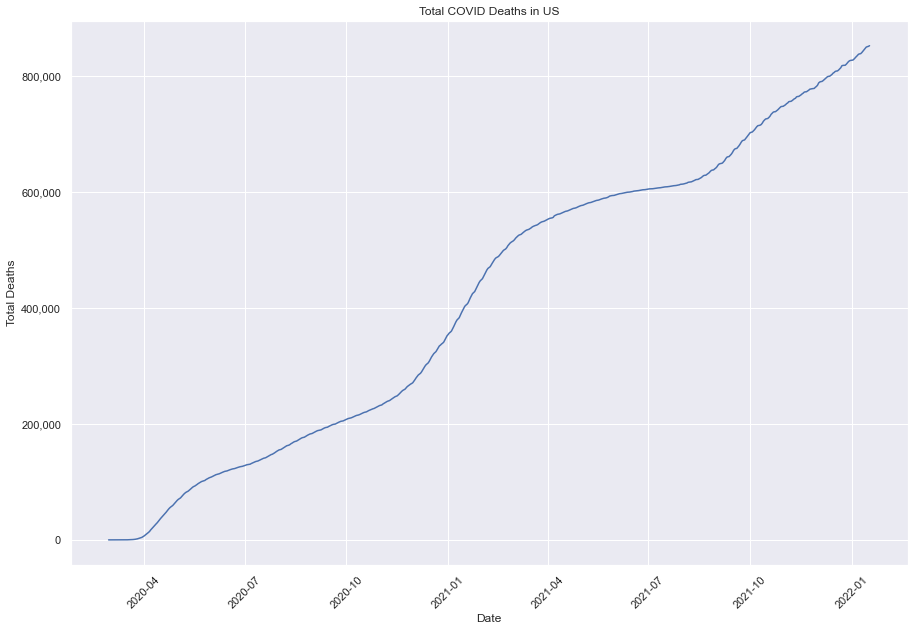

In [80]:
# Plot the total cases

sns.set()
plt.xlabel('Date')
plt.xticks(rotation= 45)
plt.ylabel('Total Deaths')
plt.title('Total COVID Deaths in US')
plt.ticklabel_format(style='plain') 
plt.plot(df_us_deaths.index, df_us_deaths['total_deaths'])

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

In [81]:
# Split the data into a training and testing set
# Training will be all data before December 2021 and Testing will be all data since then
#df_us.head()
train = df_us_deaths[df_us_deaths.index < pd.to_datetime('2021-12-01', format='%Y-%m-%d')]
test = df_us_deaths[df_us_deaths.index >= pd.to_datetime('2021-12-01', format='%Y-%m-%d')]

In [82]:
y = train['total_deaths']

In [83]:
import warnings
warnings.filterwarnings('ignore')
sarimax_gridsearch(y, pdq, pdqs, freq='D')

SARIMAX (0, 0, 0) x (0, 0, 0, 7) : AIC Calculated =18492.91494362249
SARIMAX (0, 0, 0) x (0, 0, 1, 7) : AIC Calculated =17832.983193351123
SARIMAX (0, 0, 0) x (0, 0, 2, 7) : AIC Calculated =18485.075266765773
SARIMAX (0, 0, 0) x (0, 1, 0, 7) : AIC Calculated =13489.029170714035
SARIMAX (0, 0, 0) x (0, 1, 1, 7) : AIC Calculated =12920.767199775597
SARIMAX (0, 0, 0) x (0, 1, 2, 7) : AIC Calculated =11865.984672044713
SARIMAX (0, 0, 0) x (0, 2, 0, 7) : AIC Calculated =11129.429641238425
SARIMAX (0, 0, 0) x (0, 2, 1, 7) : AIC Calculated =10914.651702990297
SARIMAX (0, 0, 0) x (0, 2, 2, 7) : AIC Calculated =10758.450965924512
SARIMAX (0, 0, 0) x (1, 0, 0, 7) : AIC Calculated =13055.399780347085
SARIMAX (0, 0, 0) x (1, 0, 1, 7) : AIC Calculated =12618.638014837561
SARIMAX (0, 0, 0) x (1, 0, 2, 7) : AIC Calculated =12353.962153606084
SARIMAX (0, 0, 0) x (1, 1, 0, 7) : AIC Calculated =11144.95677198621
SARIMAX (0, 0, 0) x (1, 1, 1, 7) : AIC Calculated =11026.190881788594
SARIMAX (0, 0, 0) x (1

SARIMAX (0, 1, 1) x (1, 0, 2, 7) : AIC Calculated =9060.256658623073
SARIMAX (0, 1, 1) x (1, 1, 0, 7) : AIC Calculated =9095.120612363879
SARIMAX (0, 1, 1) x (1, 1, 1, 7) : AIC Calculated =9068.086391752
SARIMAX (0, 1, 1) x (1, 1, 2, 7) : AIC Calculated =8968.155018824633
SARIMAX (0, 1, 1) x (1, 2, 0, 7) : AIC Calculated =9233.820100165813
SARIMAX (0, 1, 1) x (1, 2, 1, 7) : AIC Calculated =9000.604268967614
SARIMAX (0, 1, 1) x (1, 2, 2, 7) : AIC Calculated =8899.013128660237
SARIMAX (0, 1, 1) x (2, 0, 0, 7) : AIC Calculated =9088.741836294965
SARIMAX (0, 1, 1) x (2, 0, 1, 7) : AIC Calculated =9088.43166590251
SARIMAX (0, 1, 1) x (2, 0, 2, 7) : AIC Calculated =9063.2105688706
SARIMAX (0, 1, 1) x (2, 1, 0, 7) : AIC Calculated =9000.094771528626
SARIMAX (0, 1, 1) x (2, 1, 1, 7) : AIC Calculated =8996.65665886811
SARIMAX (0, 1, 1) x (2, 1, 2, 7) : AIC Calculated =8963.209148285368
SARIMAX (0, 1, 1) x (2, 2, 0, 7) : AIC Calculated =9066.433884588623
SARIMAX (0, 1, 1) x (2, 2, 1, 7) : AIC Ca

KeyboardInterrupt: 

In [ ]:
SARIMAXmodel = SARIMAX(y, order = (0, 2, 2), seasonal_order=(1,1,2,7))
SARIMAXmodel = SARIMAXmodel.fit()
y_pred_sarima = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df_sarima = y_pred_sarima.conf_int(alpha = 0.05)
y_pred_df_sarima["Predictions"] = SARIMAXmodel.predict(start = y_pred_df_sarima.index[0], end = y_pred_df_sarima.index[-1])
y_pred_df_sarima.index = test.index
y_pred_out_sarima = y_pred_df_sarima["Predictions"]


plt.xlabel('Date')
plt.xticks(rotation= 45)
plt.ylabel('Total Cases')
plt.title('Predictions for Total COVID cases in US')
plt.ticklabel_format(style='plain') 
plt.plot(train, color = 'black', label = 'Training')
plt.plot(test, color = 'green', label = 'Testing')
plt.plot(y_pred_out_arma, color="red", label = 'ARMA Predictions')
plt.plot(y_pred_out_arima, color="yellow", label = 'ARMIA Predictions')
plt.plot(y_pred_out_sarima, color="Blue", label = "SARIMA Predictions")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.rcParams['figure.figsize'] = [15, 10]
plt.legend()
plt.show()

In [ ]:
# Evaluate performance for SARIMA
SARIMA_rmse = np.sqrt(mean_squared_error(test['total_cases'].values, y_pred_df_sarima["Predictions"]))

print("SARIMA RMSE: ", SARIMA_rmse)

In [ ]:
# Get future predictions

y_pred_sarima = SARIMAXmodel.get_forecast(steps=183)
y_pred_df_sarima = y_pred_sarima.conf_int(alpha = 0.05)
y_pred_df_sarima["Predictions"] = SARIMAXmodel.predict(start = y_pred_df_sarima.index[0], end = y_pred_df_sarima.index[-1])
y_pred_out_sarima = y_pred_df_sarima["Predictions"]

plt.xlabel('Date')
plt.xticks(rotation= 45)
plt.ylabel('Total Cases')
plt.title('Predictions for Total COVID Cases in US for Next 6 Months')
plt.ticklabel_format(style='plain') 
plt.plot(train, color = 'black', label = 'Training')
plt.plot(test, color = 'green', label = 'Testing')
plt.plot(y_pred_out_sarima, color="Blue", label = "SARIMA Predictions")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.rcParams['figure.figsize'] = [15, 10]
plt.legend()
plt.show()

In [ ]:
# Get future predictions

y_pred_sarima = SARIMAXmodel.get_forecast(steps=500)
y_pred_df_sarima = y_pred_sarima.conf_int(alpha = 0.05)
y_pred_df_sarima["Predictions"] = SARIMAXmodel.predict(start = y_pred_df_sarima.index[0], end = y_pred_df_sarima.index[-1])
y_pred_out_sarima = y_pred_df_sarima["Predictions"]

plt.xlabel('Date')
plt.xticks(rotation= 45)
plt.ylabel('Total Cases')
plt.title('Predictions for Total COVID Cases in US for Next 500 days')
plt.ticklabel_format(style='plain') 
plt.plot(train, color = 'black', label = 'Training')
plt.plot(test, color = 'green', label = 'Testing')
plt.plot(y_pred_out_sarima, color="Blue", label = "SARIMA Predictions")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.rcParams['figure.figsize'] = [15, 10]
plt.legend()
plt.show()